In [ ]:
!pip install ultralytics
!pip install ultralyticsplus

In [2]:
import torch
from ultralytics import YOLO
from ultralyticsplus import render_result

# Load the YOLO model (make sure to replace 'yolov8m.pt' with the actual path to your model file)
model = YOLO('yolov8m.pt')

# https://www.freecodecamp.org/news/how-to-detect-objects-in-images-using-yolov8/

100%|██████████| 49.7M/49.7M [00:00<00:00, 209MB/s]


Downloading...
From: https://drive.google.com/uc?id=1lao5EIuC8hgVrMdECJ3s4vR8on7CO2ea
To: /content/image.jpg
100%|██████████| 30.2k/30.2k [00:00<00:00, 20.2MB/s]


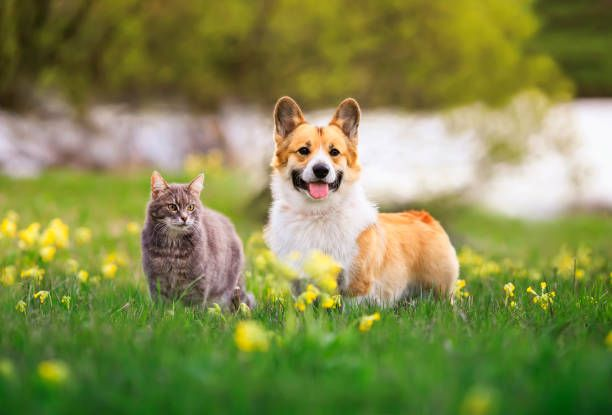

In [3]:
import gdown
from PIL import Image

# Replace 'your_file_id' with the actual file ID from the Google Drive link
file_id = '1lao5EIuC8hgVrMdECJ3s4vR8on7CO2ea'

# Construct the download link
url = f'https://drive.google.com/uc?id={file_id}'

# Download the image
output = 'image.jpg'
gdown.download(url, output, quiet=False)

# Load and display the image using PIL
image = Image.open(output)
image

In [4]:
import cv2
# Perform inference on the image
result = model.predict(image)[0]
print()

for box in result.boxes:
  class_id = result.names[box.cls[0].item()]
  cords = box.xyxy[0].tolist()
  cords = [round(x) for x in cords]
  conf = round(box.conf[0].item(), 2)
  print("Object type:", class_id)
  print("Coordinates:", cords)
  print("Probability:", conf)
  print("---")

Ultralytics YOLOv8.0.43 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m summary (fused): 218 layers, 25886080 parameters, 0 gradients, 78.9 GFLOPs

0: 448x640 1 cat, 1 dog, 118.5ms
Speed: 0.6ms preprocess, 118.5ms inference, 42.1ms postprocess per image at shape (1, 3, 640, 640)



Object type: dog
Coordinates: [261, 94, 461, 314]
Probability: 0.94
---
Object type: cat
Coordinates: [140, 170, 256, 315]
Probability: 0.91
---


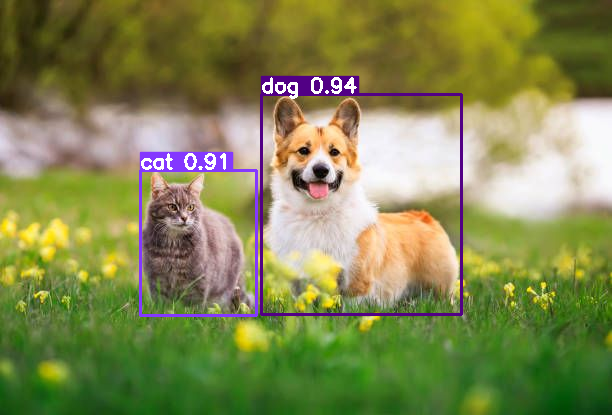

In [5]:
render = render_result(model=model, image=image, result=result)
render

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import pandas as pd

csv_file_path = 'drive/MyDrive/small_oidv6-boxes.csv'
df = pd.read_csv(csv_file_path)

In [8]:
# !mkdir 'lab4'
# !mkdir 'lab4/labels'
# !mkdir 'lab4/images'
folder_path = ['lab4/labels/test', 'lab4/labels/train', 'lab4/images/test', 'lab4/images/train']

for i in folder_path:
    !rm -r "$i"
    !mkdir "$i"

In [9]:
desired_label = '/m/02wbm'
filtered_df = df[df['LabelName'] == desired_label]

In [11]:
no_copys = filtered_df.drop_duplicates(subset=['ImageID'])
num_el = 2400
subset_df = no_copys.head(int(num_el*5/6))

In [12]:
small_df = df[df['ImageID'].isin(no_copys['ImageID'])]

In [13]:
output_file_path = 'train.txt'
with open(output_file_path, 'w') as file:
    for img_id in subset_df['ImageID']:
        file.write(f'train/{img_id}\n')

test_df = no_copys.iloc[int(num_el*5/6):num_el]

test_output_file_path = 'test.txt'
with open(test_output_file_path, 'w') as test_file:
    for img_id in test_df['ImageID']:
        test_file.write(f'train/{img_id}\n')

In [25]:
labels_train_path = "lab4/labels/train/"
for train_index, train_row in subset_df.iterrows():
    tmp = small_df[small_df['ImageID'] == train_row["ImageID"]]
    with open(labels_train_path+train_row["ImageID"]+".txt", 'w') as file:
        for index, row in tmp.iterrows():
            x_center = (row["XMax"]+row["XMin"])/2
            y_center = (row["YMax"]+row["YMin"])/2
            width = row["XMax"]-row["XMin"]
            height = row["YMax"]-row["YMin"]
            if(row["LabelName"] == desired_label):
                file.write(f'1 {x_center} {y_center} {width} {height}\n')
            else:
                file.write(f'0 {x_center} {y_center} {width} {height}\n')

labels_test_path = "lab4/labels/test/"
for test_index, test_row in test_df.iterrows():
    tmp = small_df[small_df['ImageID'] == test_row["ImageID"]]
    with open(labels_test_path+test_row["ImageID"]+".txt", 'w') as file:
        for index, row in tmp.iterrows():
            x_center = (row["XMax"]+row["XMin"])/2
            y_center = (row["YMax"]+row["YMin"])/2
            width = row["XMax"]-row["XMin"]
            height = row["YMax"]-row["YMin"]
            if(row["LabelName"] == desired_label):
                file.write(f'1 {x_center} {y_center} {width} {height}\n')
            else:
                file.write(f'0 {x_center} {y_center} {width} {height}\n')

In [16]:
import requests

def download_file(url, destination):
    try:
        response = requests.get(url, stream=True)
        with open(destination, 'wb') as file:
            for chunk in response.iter_content(chunk_size=8192):
                if chunk:
                    file.write(chunk)
        print(f"Download completed. File saved at: {destination}")
    except Exception as e:
        print(f"Error downloading file from {url}: {e}")

if __name__ == "__main__":
    # Replace 'YOUR_URL' with the actual URL of the file you want to download
    file_url = 'https://raw.githubusercontent.com/openimages/dataset/master/downloader.py'

    # Replace 'destination_file.extension' with the desired local file name
    destination_file = 'downloader.py'

    download_file(file_url, destination_file)

Download completed. File saved at: downloader.py


In [ ]:
!pip install boto3
!pip install botocore

In [20]:
!python downloader.py "train.txt" --download_folder="lab4/images/train"

In [21]:
!python downloader.py "test.txt" --download_folder="lab4/images/test"

In [27]:
import yaml

data = {
    'train': '../../lab4/images/train',
    'val': '../../lab4/images/test',
    'nc': 2,
    'names': ['non-food', 'food']
}

with open('yolov8_data.yaml', 'w') as yaml_file:
    yaml.dump(data, yaml_file, default_flow_style=False)

In [28]:
model2 = YOLO('yolov8n.pt')

In [30]:
model2.train(data="yolov8_data.yaml", epochs=5, project='drive/MyDrive/YOLO_res')

Ultralytics YOLOv8.0.43 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=yolov8_data.yaml, epochs=5, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=drive/MyDrive/YOLO_res, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, min_memory=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, split=val, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimiz

In [34]:
no_copys.iloc[5000:5001]

ImageID     Source LabelName  Confidence     XMin  ...  XClick4X  XClick1Y  XClick2Y  XClick3Y  \
36803  30a438b3ea676abd  activemil  /m/02wbm           1  0.54125  ...      -1.0      -1.0      -1.0      -1.0   

       XClick4Y  
36803      -1.0  

[1 rows x 21 columns]

In [80]:
import os
import random

folder_path = 'lab4/images/test'
image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
random_images = random.sample(image_files, 5)

for path in random_images:
    image_path = os.path.join(folder_path, path)
    image = Image.open(image_path)

    result = model2.predict(image)[0]
    blurred_image = image.copy()
    for box in result.boxes:
        if result.names[box.cls[0].item()] == 'food':
            cords = box.xyxy[0].tolist()
            cords = [round(x) for x in cords]
            blurred_image.paste(blurred_image.crop(cords).filter(ImageFilter.BLUR()), cords)


    display(blurred_image)


Output hidden; open in https://colab.research.google.com to view.


0: 448x640 25 non-foods, 4 foods, 18.2ms
Speed: 0.7ms preprocess, 18.2ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 640)


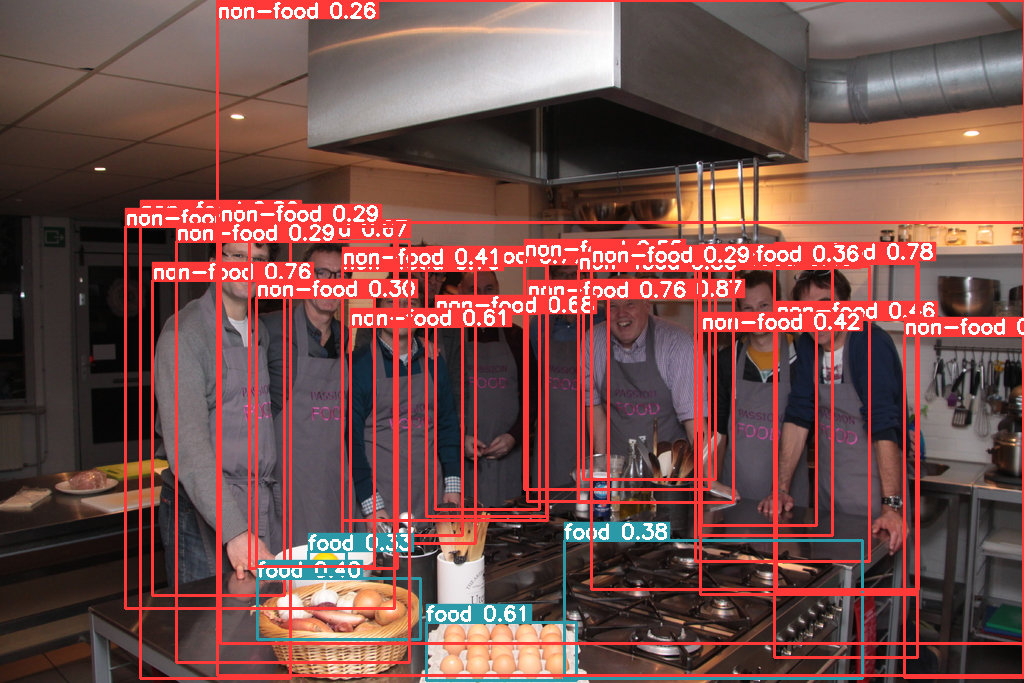

In [81]:
image_path = os.path.join(folder_path, random_images[0])
image = Image.open(image_path)

result = model2.predict(image)[0]
render = render_result(model=model2, image=image, result=result)
render


0: 448x640 1 non-food, 5 foods, 19.7ms
Speed: 0.8ms preprocess, 19.7ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)


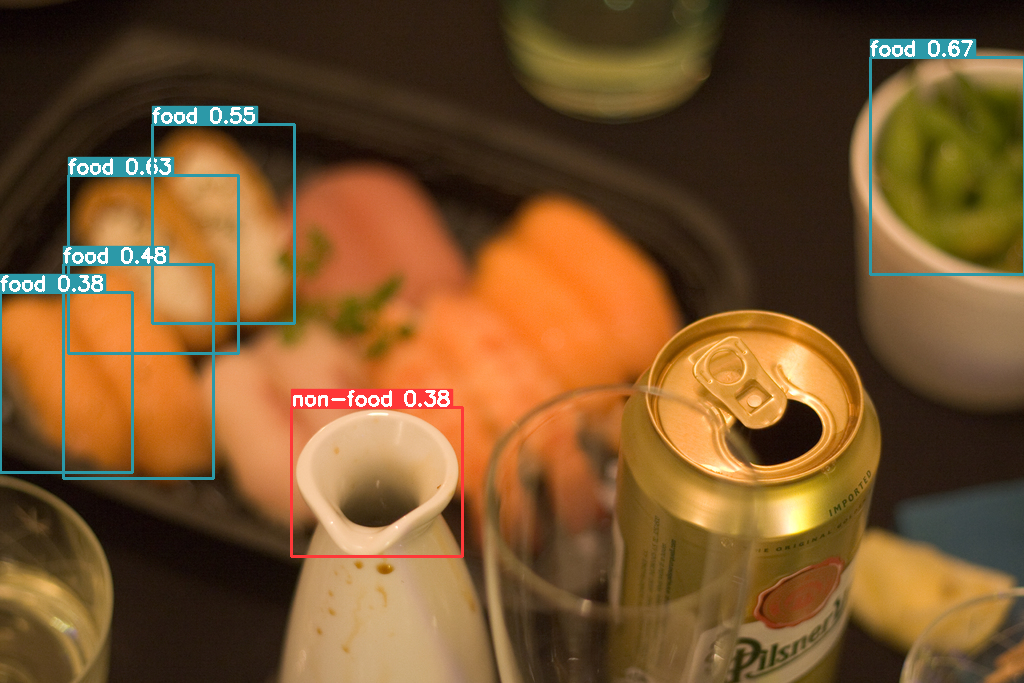

In [82]:
image_path = os.path.join(folder_path, random_images[1])
image = Image.open(image_path)

result = model2.predict(image)[0]
render = render_result(model=model2, image=image, result=result)
render


0: 640x640 4 non-foods, 1 food, 35.7ms
Speed: 0.8ms preprocess, 35.7ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)


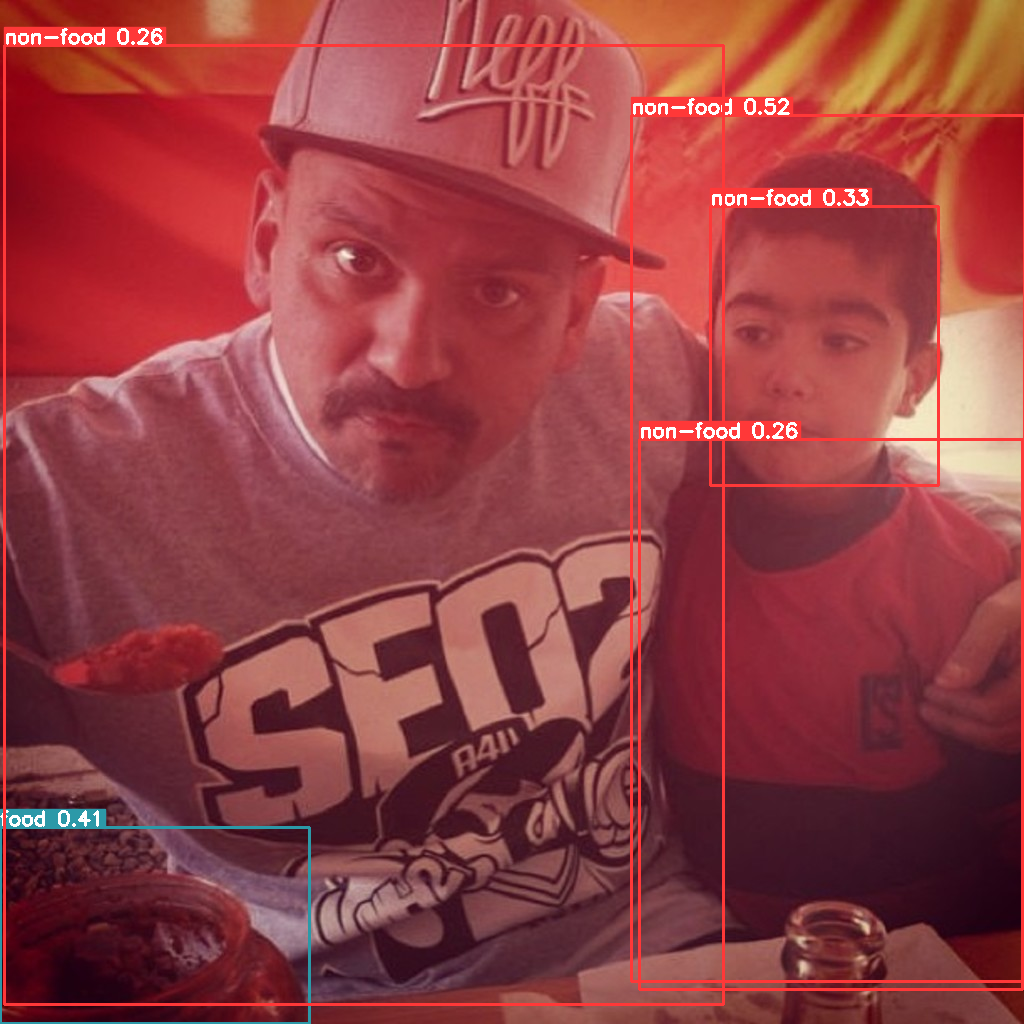

In [83]:
image_path = os.path.join(folder_path, random_images[2])
image = Image.open(image_path)

result = model2.predict(image)[0]
render = render_result(model=model2, image=image, result=result)
render


0: 480x640 1 food, 17.4ms
Speed: 0.7ms preprocess, 17.4ms inference, 15.1ms postprocess per image at shape (1, 3, 640, 640)


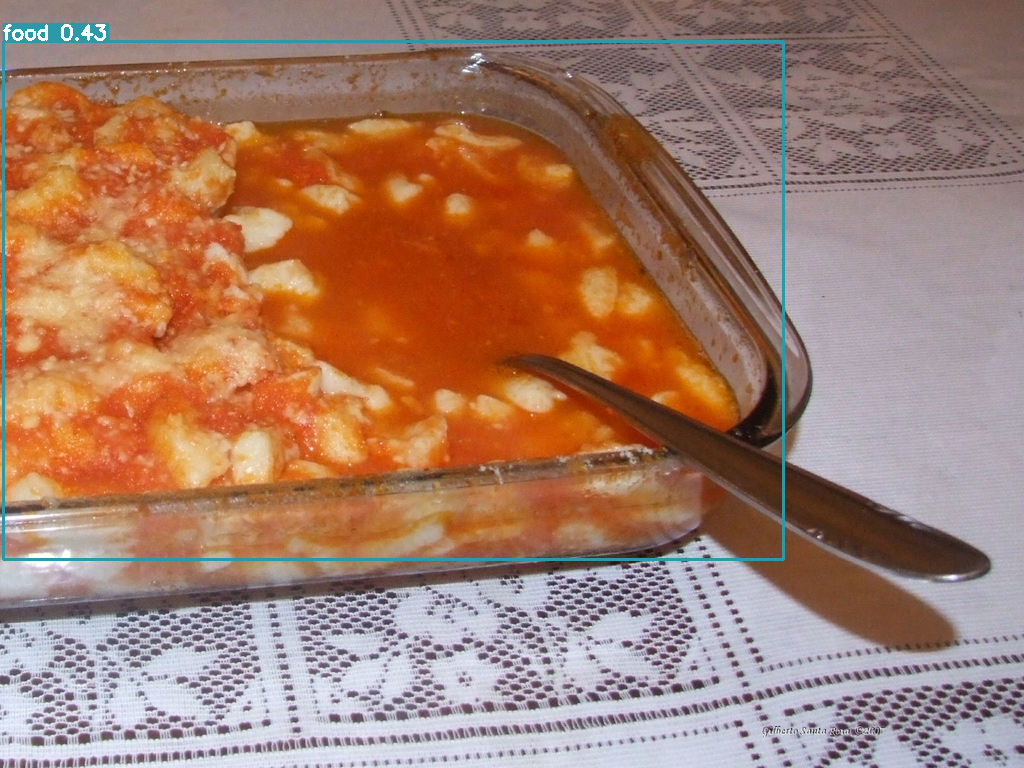

In [84]:
from PIL import Image, ImageDraw, ImageFilter
from IPython.display import display

image_path = os.path.join(folder_path, random_images[3])
image = Image.open(image_path)

result = model2.predict(image)[0]

render = render_result(model=model2, image=image, result=result)
render


0: 480x640 1 food, 27.7ms
Speed: 0.6ms preprocess, 27.7ms inference, 9.0ms postprocess per image at shape (1, 3, 640, 640)


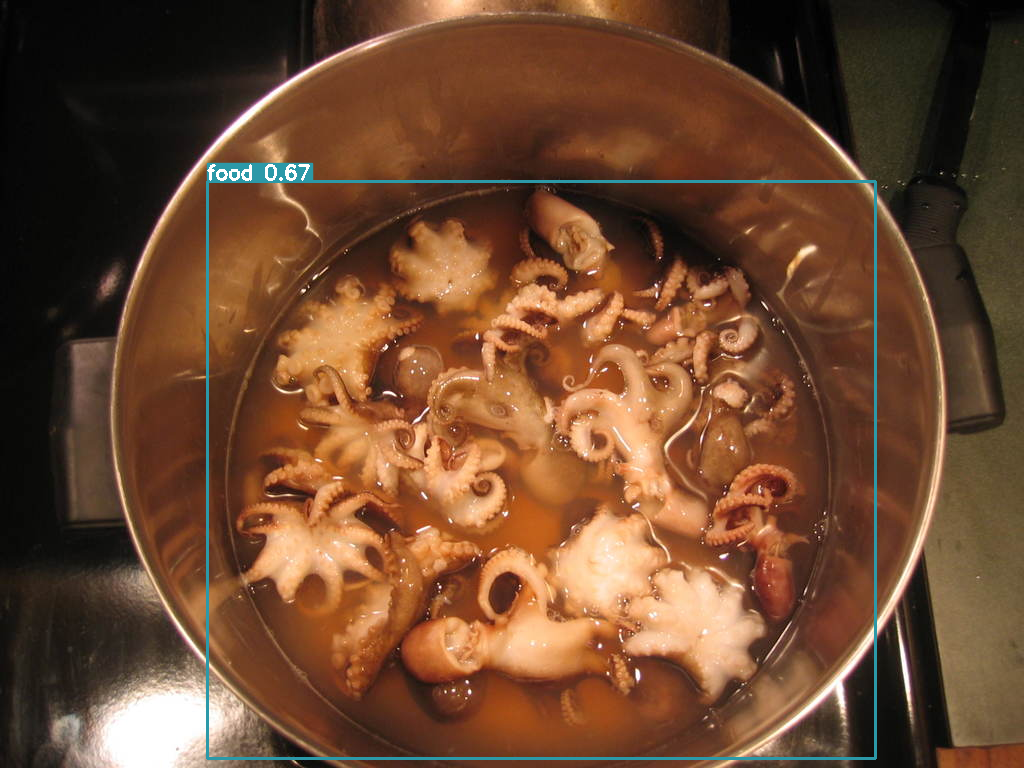

In [85]:
image_path = os.path.join(folder_path, random_images[4])
image = Image.open(image_path)

result = model2.predict(image)[0]
render = render_result(model=model2, image=image, result=result)
render